In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR -O cars24-car-price-cleaned.csv
car24 = pd.read_csv('cars24-car-price-cleaned.csv') # dataset downloading
car24.head()

--2024-04-02 15:06:41--  https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
Resolving drive.google.com (drive.google.com)... 142.250.65.110, 2607:f8b0:4025:804::200e
Connecting to drive.google.com (drive.google.com)|142.250.65.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR [following]
--2024-04-02 15:06:41--  https://drive.usercontent.google.com/download?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.7.33, 2607:f8b0:4025:811::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1690948 (1.6M) [application/octet-stream]
Saving to: ‘cars24-car-price-cleaned.csv’

cars24-car-price-cl 100%[===================>]   1.61M  --.-KB/s    in 0.1s    

2024-04-02 15:06:42 (14.7 MB/s

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
car24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [ ]:
car24.shape

(19820, 18)

In [ ]:
car24.isna().sum()

selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
5                   0
>5                  0
dtype: int64

In [ ]:
car24.nunique()

selling_price        964
year                  27
km_driven           4476
mileage              532
engine               167
max_power            484
age                   27
make                  41
model               3233
Individual             2
Trustmark Dealer       2
Diesel                 2
Electric               2
LPG                    2
Petrol                 2
Manual                 2
5                      2
>5                     2
dtype: int64

In [ ]:
car24["make"].nunique(), car24["model"].nunique()

(41, 3233)

In [ ]:
# As make and model have 41 and 3233 unique values, It increses the time complexcity of the module.
# One hot encoding will increase dimensions which inc. complexity.
# So, changing the categorical column to numerical column by using Target variable encoding (target is selling price).
car24["make"]= car24.groupby("make")["selling_price"].transform("mean")
car24["model"]= car24.groupby("model")["selling_price"].transform("mean")
# It replace the categorical make and model entries with mean of the selling_price of the that make and model, i.e. i10 ka mean selling price and hyundai ka mean selling price.

In [ ]:
car24.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


Scalling is next important thing to understand, As the range of Year is about 0 to 20-25 years and the range of the km driven is 0 to 150000-200000. The signification of the unit change in Year has more impact than Km driven. So to make it comparable, we have to take these on single scale.

In [ ]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
# X_scaled = (X-np.min(X))/(np.max(X)-np.min(X)) # for any feature X >> [0(x is min),1(x is max)]
Scaler= MinMaxScaler()
car24= pd.DataFrame(Scaler.fit_transform(car24), columns= car24.columns)
car24.head()
# 0 to 1 ke scale me trsansform kar diya gaya saari data ko.

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# To split the test and train data
from sklearn.model_selection import train_test_split

In [ ]:
y= car24["selling_price"]
x= car24.drop("selling_price", axis=1)
y.shape, x.shape
# target(y) alag define kiya gaya and

((19820,), (19820, 17))

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# training and testing data as well as target value (could be any, here 30%)

((13874, 17), (13874,), (5946, 17), (5946,))

In [ ]:
# Now show produce an linear regresion model
#1st- univariate/ with only one feature i.e. model
x1= x[["model"]]
x1_train= x_train[["model"]]
x1_test= x_test[["model"]]

So we have to,
- predict 1 output feature
- using 17 input features.

Now let's split the data.

We will divide it into 70:30 ratio:
- 70% for training,
- and 30% for testing.

x_train and y_train values are used to train the model and this same model is validated by using x_test and y_test values.

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x1_train,y_train)

LinearRegression()

In [ ]:
model.coef_ # weightage of the model feature/ w1

array([0.9967642])

In [ ]:
model.intercept_ # w0

0.0015237505846132926

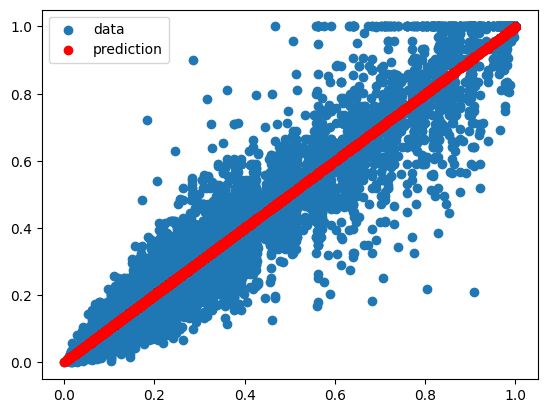

In [ ]:
y_hat = model.predict(x1)
fig = plt.figure()
plt.scatter(x1,y,label='data') # Take only one feature- model and target- selling_price/ blue vaale
plt.scatter(x1,y_hat,color='red',label='prediction') # model it-self is in linear_regression and it represent predicted value.
plt.legend()
plt.show()

In [ ]:
# Multivariate, also implement Linear regression bcoz we have to get best fitted line in any no. of plane.
mul_model= LinearRegression()
mul_model.fit(x_train, y_train) # x_train means data with all 17 features

LinearRegression()

In [ ]:
mul_model.coef_
# weightage of the features:
# x1,x2,x3,x4,...,xd
# w1,w2,w3,w4,...,wd
# 19820 data points and 17 features

array([ 7.23382199e+11, -2.50488281e-01, -2.32558310e-01,  7.39953774e-02,
        4.68742062e-02,  7.23382199e+11,  6.61604471e-02,  8.58973267e-01,
       -7.18488746e-03, -7.03116019e-03,  6.98577387e-03,  1.32957359e-01,
        1.50077817e-02, -6.83704171e-03, -3.69616522e-03, -1.62563011e-02,
       -2.35725832e-02])

In [ ]:
mul_model.intercept_ # w0 the value of w0 is high because one of the coef is tends to the same value of 723382...

-723382198910.7482

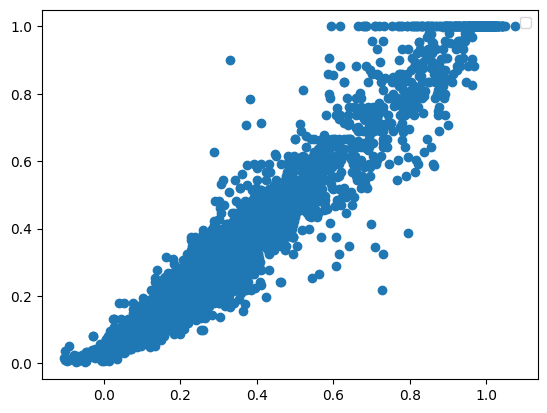

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure()
y_hat= mul_model.predict(x_test)
plt.scatter(y_hat, y_test)
plt.legend()
plt.show()

In [ ]:
# R2 score
print(mul_model.score(x_train, y_train))
print(mul_model.score(x_test, y_test))
# Test and train data have almost same R2 score, better model

0.9459004943250285
0.945987722055055


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

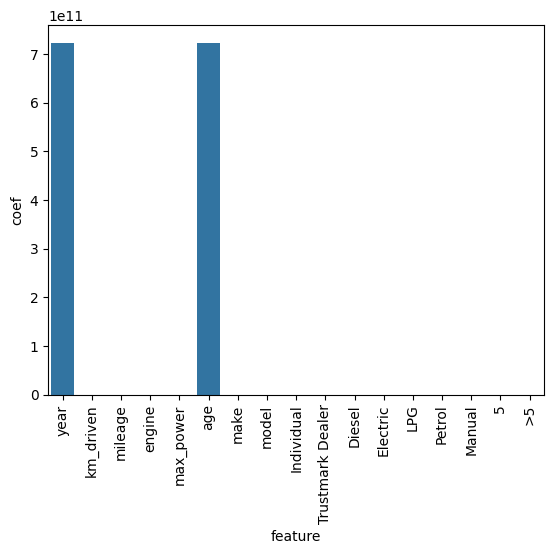

In [ ]:
# benefit of feature scaling. By this we can compare importance of all features
import seaborn as sns
show= pd.DataFrame(list(zip(x_test.columns,np.abs(mul_model.coef_))),
                   columns=['feature','coef'])
sns.barplot(x='feature',y='coef',data= show)
plt.xticks(rotation=90)
# multiverse model ke absolute value i.e. weightage on scale
# columns are features

year and age have most weightage among the features. This can only be done i.e. comparision just bcoz of the scaling.

In [ ]:
# For maximum and minimum weightage features.
print(x_test.columns[np.argmax(np.abs(mul_model.coef_))],x_test.columns[np.argmin(np.abs(mul_model.coef_))])

year Manual


In [ ]:
# Linear Regression
class LinearRegression() :
    def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

In [ ]:
# To define predict function (x*w + w0)
def predict(self, X):
    return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [ ]:
# To define our evaluation matrics/ R2 score
def r2_score(self, X, y):
    y_ = predict(self,X) # like y_hat
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

LinearRegression.score=r2_score

In [ ]:
# updation of weight coff_ (this complete def function updates all the weights in single step)
def update_weights(self):
    Y_pred = self.predict( self.X )
    # calculate gradients
    dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m # dot product is scalar sum
    db = - 2*np.sum(self.Y - Y_pred)/self.m
    # update weights
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    return self

LinearRegression.update_weights=update_weights

In [ ]:
def fit(self, X, Y):
    # m= no_of_training_examples, d= no_of_features
    self.m, self.d = X.shape
    # weight initialization- can be randlomly selected or Zero
    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y
    self.error_list=[]
    # gradient descent learning
    for i in range(self.iterations): # standard iterations is 100 jo upper 5 define tha
        self.update_weights()
        Y_pred=X.dot(self.W)+self.b
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
    return self

LinearRegression.fit=fit
# These many things are linear regression to update the weights

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# !gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
!wget https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh -O cars24-car-price-clean.csv

--2024-03-16 04:26:11--  https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
Resolving drive.google.com (drive.google.com)... 74.125.20.139, 74.125.20.100, 74.125.20.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh [following]
--2024-03-16 04:26:11--  https://drive.usercontent.google.com/download?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7103602 (6.8M) [application/octet-stream]
Saving to: ‘cars24-car-price-clean.csv’

cars24-car-price-cl 100%[===================>]   6.77M  40.6MB/s    in 0.2s    

2024-03-16 04:26:13 (40

In [ ]:
df= pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [ ]:
lr.score(X_train, y_train) # result not as expected

0.9101033692790105

In [ ]:
lr.score(X_test, y_test)

0.9075347558295035

In [ ]:
lr.W

year                0.125722
km_driven          -0.047847
mileage            -0.050197
engine              0.093654
max_power           0.154132
age                -0.125722
make                0.189528
model               0.371064
Individual         -0.025478
Trustmark Dealer   -0.004997
Diesel              0.045118
Electric            0.016967
LPG                 0.002790
Petrol             -0.042832
Manual             -0.105770
5                  -0.005216
>5                  0.003182
dtype: float64

In [ ]:
lr.b

0.0011317414350942184

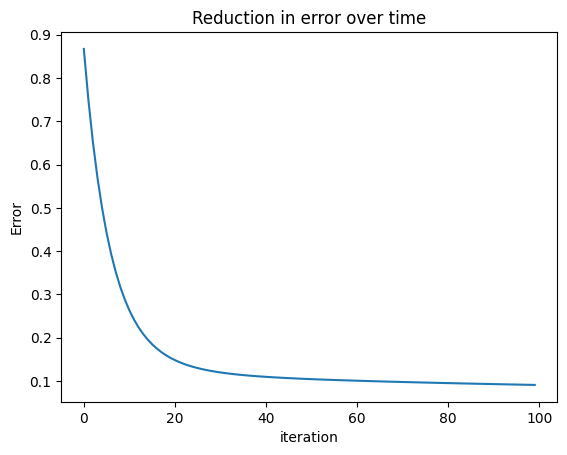

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
# OLS- Statsmodel
import statsmodels.api as sm

In [ ]:
# !gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
!wget https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh -O cars24-car-price-clean.csv

--2024-03-16 04:26:15--  https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
Resolving drive.google.com (drive.google.com)... 74.125.20.139, 74.125.20.100, 74.125.20.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh [following]
--2024-03-16 04:26:15--  https://drive.usercontent.google.com/download?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7103602 (6.8M) [application/octet-stream]
Saving to: ‘cars24-car-price-clean.csv’

cars24-car-price-cl 100%[===================>]   6.77M  --.-KB/s    in 0.03s   

2024-03-16 04:26:17 (19

In [ ]:
df= pd.read_csv("cars24-car-price-clean.csv")
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
y= df[['selling_price']]
x= df.drop('selling_price', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 10)
y_train= np.array(y_train)

In [ ]:
X_sm = sm.add_constant(x_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()
# Print the statistics summary of the model, which include mostly all the info.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.418e+04
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:26:17   Log-Likelihood:                 96.424
No. Observations:               13874   AIC:                            -158.8
Df Residuals:                   13857   BIC:                            -30.71
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0022      0.002  

In [ ]:
# By using sklearn
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)
print('R2 score:', model.score(x_train, y_train))

pd.DataFrame(
    {
    'feature':['constant']+list(x.columns),
    'coeff' :list(model.intercept_) +list(model.coef_[0])
    }
)

R2 score: 0.94244954255495


,feature,coeff
0,constant,-2.105060e-03
1,year,8.749794e+10
2,km_driven,-3.038025e-02
3,mileage,-5.136051e-02
4,engine,3.058312e-02
5,max_power,2.238940e-02
6,age,8.749794e+10
7,make,5.325285e-02
8,model,8.001234e-01
9,Individual,-1.528504e-02


Assumption of Linear Regression

- Assumption of Linearity

- Features are not multi-Collinear

  - Collinearity
  - Multi-Collinearity
- Errors are normally Distributed

- Heteroskedasticity should not exist

- No Autocorrelation

<img src='https://drive.google.com/uc?id=11ec-xn-dBFrzNkvKgkGmS8cukMWx6GsF' width=800>

We can arrive at concept of Linear regression in two ways.
- Algebra & Optimization (Geometric) - We covered this
- Probability & Statistics
We can prove that Linear regression is a very good model if all the statistical assumptions holds true.

<img src='https://drive.google.com/uc?id=1R1hw0wgENxnMnhyYnHruXXuBF-P7Pb7D' width=800>

<img src='https://drive.google.com/uc?id=1qmdEkIKTrR6cJC_-FF3px-84W9jU0h_J' width=800>

<img src='https://drive.google.com/uc?id=1zQK-v_8Fx9ugBfU1GDoSfM-RihLVCqil' width=800>

<img src='https://drive.google.com/uc?id=1i2vEc1a0AFvO7pymRbb5szSYWqotp5ft' width=800>

<img src='https://drive.google.com/uc?id=1_troBdwiSSVlYquskAebrpmIOQy71c8p' width=800>

<img src='https://drive.google.com/uc?id=1cIM0nKynnJd2oCUXNV1EOqUMhdMKpncy' width=800>

<img src='https://drive.google.com/uc?id=1HE8FYMrDN0DLxHsH-spdQX3vaIbykGE9' width=800>

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:43:21   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

In [ ]:
# VIF (Variance Inflation Factor)- for multi-collinearity of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
X_t= pd.DataFrame(X_tr_scaled, columns= x_train.columns)
vif["features"]= X_t.columns
# To evaluate the VIF values for all the features/ column
vif["VIF"]= [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])] # columns ke respect me VIF
vif["VIF"]= round(vif["VIF"], 2)
vif= vif.sort_values(by= "VIF", ascending= False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,year,inf
5,age,inf
13,Petrol,18.30
10,Diesel,17.30
16,>5,13.04
15,5,11.75
3,engine,6.26
7,model,5.78
4,max_power,5.00
2,mileage,3.22


year and age has VIF value of infinity thats imply that these features are highly linear in nature with other features or highly collinearity.
We have to remove one feature and then calculate VIF again.

In [ ]:
cols2 = vif["features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=x_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:44:10   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.002  

Same R and adj R values after removing the variable.

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    model
VIF          5.75
Name: 0, dtype: object
Current adj.R2 0.8318553555450336
Features removed: 4
List of features removed: ['year', 'Petrol', '>5', 'engine']


In [ ]:
print(vif)
print(sm_model.summary())

            Features   VIF
0              model  5.75
1          max_power  3.31
2               make  3.16
3            mileage  2.28
5                age  1.88
6             Manual  1.77
4             Diesel  1.66
7                  5  1.47
9          km_driven  1.20
8           Electric  1.18
10        Individual  1.08
11  Trustmark Dealer  1.02
12               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6538.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:48:41   Log-Likelihood:                -8348.2
No. Observations:               15856   AIC:                         1.672e+04
Df Residuals:                   15843   BIC:                         

<img src='https://drive.google.com/uc?id=1t_onTNlFNdKDy4B9GOGsZC2vSW8YrClD' width=800>

<img src='https://drive.google.com/uc?id=18QnAkJyEhcbIGtY9bruv-OfE6bTH6vgL' width=800>

<img src='https://drive.google.com/uc?id=1LStIkiL2y2Q8cvh0bolA9wjXypPgoq8w' width=800>

<img src='https://drive.google.com/uc?id=10yTJ2YoJ5mMV41J_ThaZrP1xGCCa3dMI' width=800>

Question: After plotting the plot for errors, we see the curve is non-gaussian i.e. Outliers are present. How do we identify and remove these outlier?
Ans:

- Outliers will have large error value (yi - yi_hat).
- Remove the points will high error as many as you want and fit the model again.
- Check the distribtion of errors on new model and repeat.

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

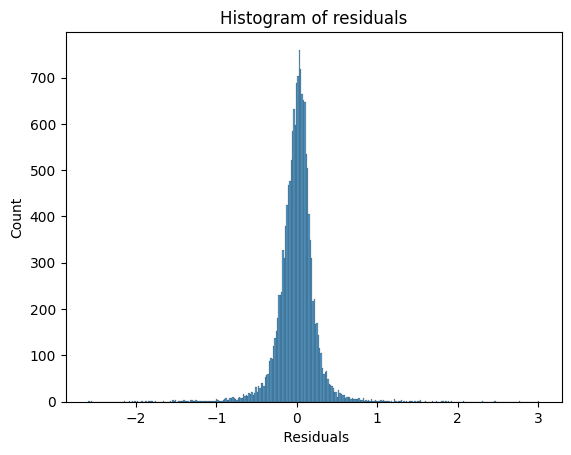

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals") # Normal distribution type graph, lets confrim by using the Shapiro test

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8526061177253723

Closer the value to 1, more is the normality.

- In this case, a value of 0.85 denotes a high level of normality for the error distribuiton

<img src='https://drive.google.com/uc?id=13fjHuhD7rfClnM8RX2ZagJQGpLL5mrun' width=800>

Text(0.5, 1.0, 'Predicted values vs Residuals')

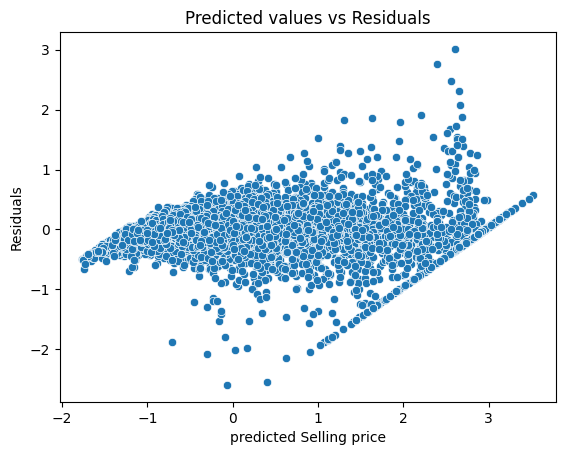

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- Notice that As we go from left to right,the spread of  errors is almost constant

#### What can we understand from this constant Residuals?
- We can assume that heteroskedasticity does not exist in our data
- There are outliers present in the dataset

We can also use "Goldfeld-Quandt Test" to verify our assumptions

### Using Goldfeld Quandt Test to check homoskedacity
This test is used to test the presence of Heteroscedasticity in the given data
- The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 1.0084600947540285), ('p-value', 0.35392832073679753)]

From the goldfeld-quandt test:

- F Statistic comes out to be >= 1.00 Implying minimal difference in variance between groups
- p-value of 0.353 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

<img src='https://drive.google.com/uc?id=1ASQ8QsZdoekhH_Z7gtq20x9yeU-VrnMZ' width=800>

### Polynomial Regression

What is Gradient Descent?
<center><img src='https://drive.google.com/uc?id=1rca9XhObHCd_K0hkSdDkO_GnIgzUSbAk' width=800></center>


What are problems?
<center><img src='https://drive.google.com/uc?id=14Yb_YU732rt8FmcnBpSCij3EUafjvnZs' width=800></center>

To overcome this time consuming technics, we use mini-Batch GD

<center><img src='https://drive.google.com/uc?id=1GWDtSNG2rpSQpuz64hHIWO2iRMPUrDwM' width=800></center>

<center><img src='https://drive.google.com/uc?id=1uycpFD9PV4CMOO1HZMa5eOTH3Y067RFG' width=800></center>

What can be the possible values of Batch size ( k ) ?


<center><img src='https://drive.google.com/uc?id=1axENukUDq6FAK0GAXqWXiO6A4LQzLgNu' width=800></center>


<center><img src='https://drive.google.com/uc?id=1l4HGDWFRXegdbk0x5DWvWcPEEOVr3RdB' width=800></center>

We actually broke down the dataset into some batches of k data.

<center><img src='https://drive.google.com/uc?id=13EDtacLbKEbrbN_Z8K4HOX4eEHXmtZBe' width=800></center>


<center><img src='https://drive.google.com/uc?id=1Sgrxc-2_98YOgO3K329Ut1eFj6bCmP75' width=800></center>


<center><img src='https://drive.google.com/uc?id=1FjBmHHTLKMl9tVVlD9YUd6wz2AjqrrLW' width=800></center>


<center><img src='https://drive.google.com/uc?id=1bL58O40weizOVz9H2pQqwcO-ExvHITws' width=800></center>


<center><img src='https://drive.google.com/uc?id=1QL-mgEn7V3n4Tw_WPxpv-FfFdEqvEplq' width=800></center>




How is Gradient Descent step progress in Mini-Batch, SGD and Batch GD ?


<center><img src='https://drive.google.com/uc?id=1xJUrzWR4jcw33ASYoSioP-5s0mCGYyWw' width=800></center>



<center><img src='https://drive.google.com/uc?id=1PHiqOLCvM5jzzj6FXHb9-g0gcvA-PwB2' width=800></center>



*Observe*
- For **Batch Gradient** descent, Since the entire data is taken for gradients,

- the weight reaches optimal value with least number of fluctuations per iteration
But due to taking whole data per iteration, the time to compute one GD step/iteration is very high


- For **Stochastic GD**,
Since only a single datapoint is used for gradients, and these datapoints can be noises in the data
Hence, there will be the maximum number of fluctuations in the weight value

- Now when **Mini-Batch GD** is used:
Since it vectorizes the data into chunks, Mini-Batch GD reaches optimal weight value the fastest
With a cose of few fluctuations in the weight value.


In [ ]:
# Mini Batch Gradient Code
import numpy as np
import matplotlib.pyplot as plt

Creaing a 5000 data with only one feature

multivariate_normal documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [ ]:
mean = np.array([4.0, 5.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 5000)

In [ ]:
data.shape

(5000, 2)

In [ ]:
data[:5]

array([[3.30453445, 4.10047804],
       [3.7703118 , 5.30403523],
       [4.37356125, 5.17987652],
       [4.57632882, 6.3820453 ],
       [3.66687659, 4.19259474]])

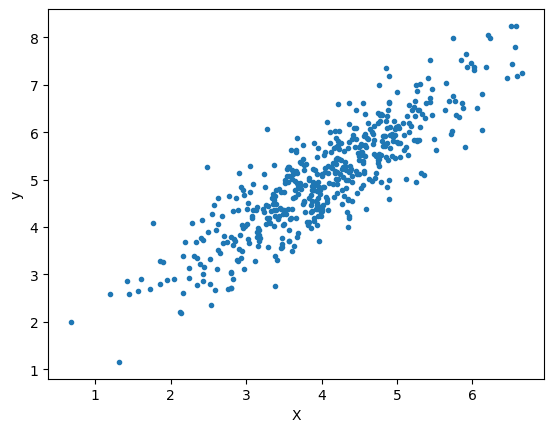

In [ ]:
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [ ]:
# Clearly we see a linear relationship, hence using Linear Regression with Mini-Batch GD
# adding bias column (for w0) to data
data = np.hstack((np.ones((data.shape[0], 1)), data))
data[:5]

array([[1.        , 3.30453445, 4.10047804],
       [1.        , 3.7703118 , 5.30403523],
       [1.        , 4.37356125, 5.17987652],
       [1.        , 4.57632882, 6.3820453 ],
       [1.        , 3.66687659, 4.19259474]])

In [ ]:
X = data[: ,:-1]
y = data[:, -1].reshape(-1,1)

In [ ]:
# Model output function
def predict(X, weight):
    return np.dot(X, weight)

# function to compute gradient of error function w.r.t. weight
def gradient(X, y, weight):
    y_pred = predict(X, weight)
    grad = np.dot(X.transpose(), (y_pred - y))
    return grad

# function to compute the error for current values of weight i.e MSE
def cost(X, y, weight):
    y_pred = predict(X, weight)
    e = np.mean((y-y_pred)**2)

    return e

In [ ]:
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size = 32):

    mini_batches = []
    data = np.hstack((X, y))

    # Already shuffling the data so choosing any set of 32 , will create the same scenario as randomly selecting 32 points
    np.random.shuffle(data)
    minibatch_count = data.shape[0] // batch_size
    i = 0

    for i in range(minibatch_count + 1):
        # stores 32 datapoint for a single set out of 156
        mini_batch = data[i * batch_size: (i + 1)*batch_size, :]
        X_minibatch = mini_batch[:, :-1]
        Y_minibatch = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_minibatch, Y_minibatch))

    return mini_batches

In [ ]:
# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.0001, batch_size = 32):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3

    for itr in range(max_iters):
        # creates mini- batch
        mini_batches = create_mini_batches(X, y, batch_size)

        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            weight = weight - learning_rate * gradient(X_mini, y_mini, weight)
            error_list.append(cost(X_mini, y_mini, weight))

    return weight, error_list

**Observe**

The only difference from the earlier scratch implementation of Linear Regression and here is:
- The introduction of **mini_batches**

w_0 =  [0.34785465]
w_1 =  [[1.14832952]]


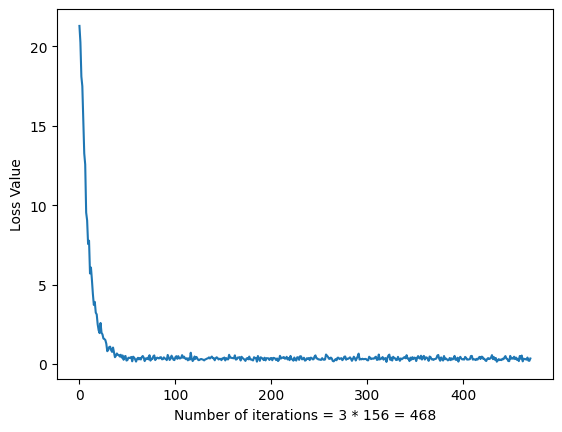

In [ ]:
# PLotting the weight of the Linear regretion
weight, error_list = gradientDescent(X, y)
print("w_0 = ", weight[0])
print("w_1 = ", weight[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations = 3 * 156 = 468")
plt.ylabel("Loss Value")
plt.show()

#### We only select iteration as 3 but plot shows iteration as 468, Why ?

Ans: As we have 156 sets of 32 datapoints, and there is 3 iteration:
- total iteration = $3 \times 156 = 468$

Lets consider another dummy data

- Here, we have 50 datapoints
- But now the data is non-linear in nature

In [ ]:
np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


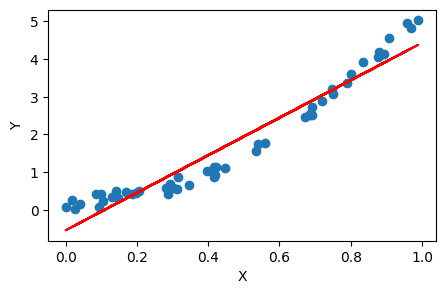

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

output = model.predict(X)
print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**observe**

As Linear Regression did not fit the data well

- Concluding that **Linear Regression is not the most suitable model to be used**

#### How to make Linear Regression,  Quadratic ?

By adding a new feature $f_2 = f_1^2$, such that:

- $\hat{y^{(i)}} = w_0 + w_1 f_1 + w_2 {f_1}^2$

**Note:** Due to addition of a higher degree, $f_1^2$ ($>1$) for a feature,
- we call this model as **Polynomial Regression**


<br>

#### Do we need a separate implementation for Polynomial Regression?

Ans: No, we just need to add a new data column $f_2 = f_1^2$

<center><img src='https://drive.google.com/uc?id=1TVKLEQX8_ZMaDHQjpB41Ub0eGav58hxq' width=800></center>

**observe**

For the Polynomial Regression equation $\hat{y^{(i)}} = w_0 + w_1f_1 + w_2 f_1^2$
- it is still a linear combination of weights since the degree of weights are 1

<br>

**Concluding** that if we were to **plot the learnt hyperplane** of Polynomial Regression for $f_1$ and $f_2=f_1^2$
- The hyperplane **will be linear**


<center><img src='https://drive.google.com/uc?id=1iaiZNMyx159d6h0_NiCtRfQdebkok8OQ' width=800></center>



In [ ]:
# Creating polynomial reg with $X^2$ feature added

def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

Adj. R-square: 0.9947910474710182


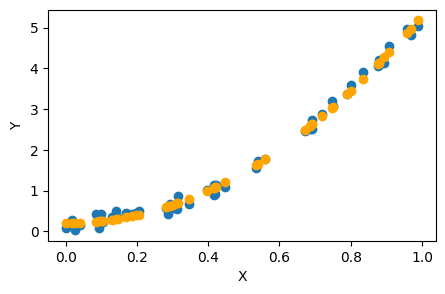

In [ ]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**observe**
- The performance of the model increased drastically
- Meaning that a non-linear feature did the trick

But are we sure that degree=2 will be best? What about higher degrees?

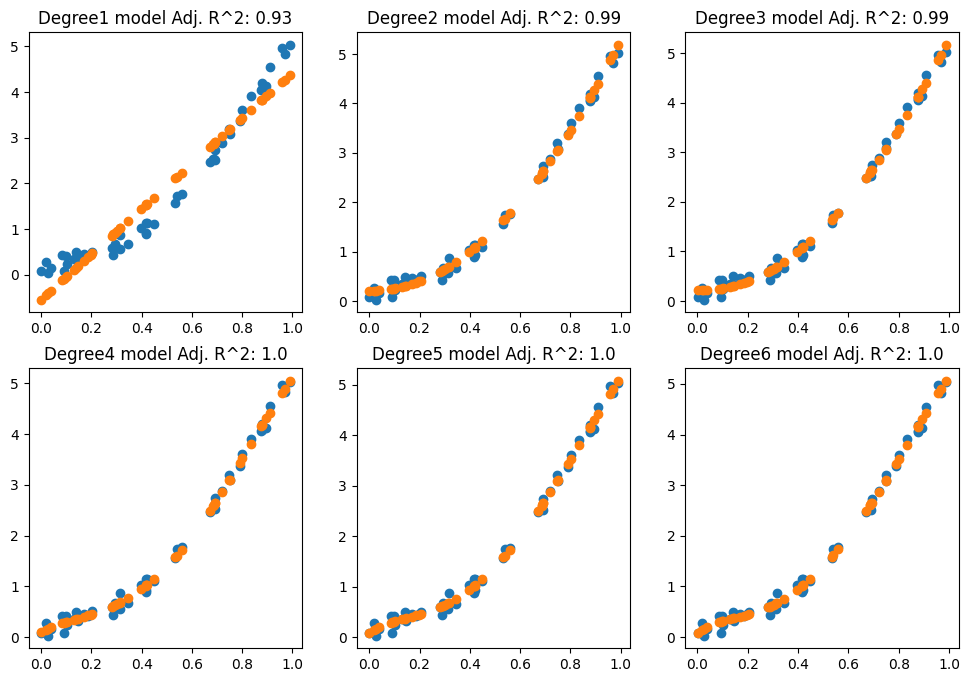

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

In [ ]:
# As the degree of the feature being added increases, the model performance gets better

#### Which model has the highest Adj R-squared ?

Ans: Clearly, we see that Polynomial regression with degrees:
- Degree 2,3,4,5,6 all have the highest Adj. R-squared value

**This should mean**
-  polynomial Regression with degree of 20, 40 should also perform well

## **Overfitting**

#### What could be the potential problem with very high degree models ?

Ans: high degree models become  very complex:
- is that they may **learn noise besides meaningful patterns**

<br>

#### Do you remember what matters in ML the most ?
Ans: The ML model must generalise the data, but for Higher degree polynomial

- the model may learn every pattern in training data (including noise) which will improve training performance


<center><img src='https://drive.google.com/uc?id=1B5GmcIHes19oBHvSIceRVdbj658ULOub' width=800></center>

- But this learning may impact general training
- and  cause the model to not perform well on testing data

**Note:** This is called as **Overfitting** --> typically when **training performance is really good but testing performance is bad.**

Recall the case of **applying degree=1 on our data**,
- model isnt even capable of learning the meaningful patterns
- Forget performing good on testing data

<center><img src='https://drive.google.com/uc?id=10KC_Jc665I4EDIpYhbRQPYg5zo0Dr8GC' width=800></center>

this low complexity model may not even be able to learn the patterns of training data

<br>

**Note:** This is called as **Underfitting** --> typically when **both training and testing performance is bad**


<center><img src='https://drive.google.com/uc?id=1IAk3keYmrRK2OjrvQ3WQyxz6yJ6o8dLh' width=800></center>


## Why choose degree=2?  This can be explained by Occam's Razor

# **Occam's Razor**

<center><img src='https://drive.google.com/uc?id=18s73wPeDqP5WOG-wWLFK5JDoq0XITf2-' width=800></center>

Lets perform the implementation for Linear Regression
- With degree $\in [1,34]$ , and plot the train and test performance

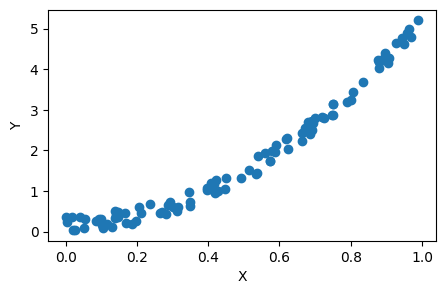

In [ ]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 100 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))

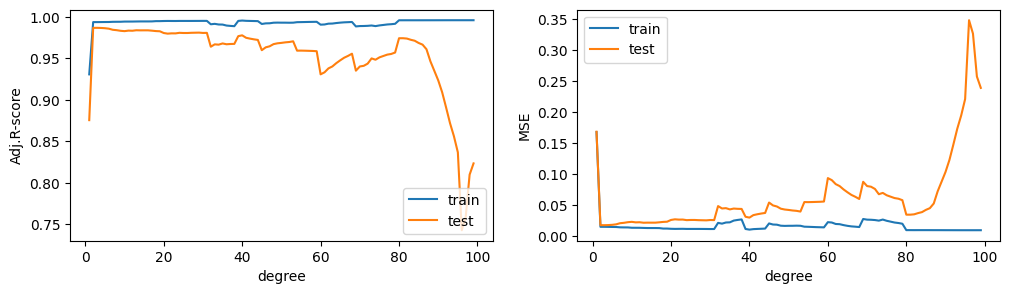

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 100)), train_scores, label="train")
axes[0].plot(list(range(1, 100)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 100)), train_loss, label="train")
axes[1].plot(list(range(1, 100)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()

**observe**

As we go in higher Degree, the model test performance drop significantly
- Which clearly indicates Overfitting

While in the lower Degree, the model test and train perfromance is very low
- Which shows Underfitting

# **Bias-Variance Tradeoff**

<center><img src='https://drive.google.com/uc?id=1LYOeJ4XveAzhr94GQGYnxK7da3d_v6qf' width=800></center>


<center><img src='https://drive.google.com/uc?id=1-o3JfSwzU-597XpoXv0v2C6NKfMdy3gt' width=800></center>


<center><img src='https://drive.google.com/uc?id=16QmF28IbVV3el-LIQMo3Bz8SSfVYAnt6' width=800></center>



<center><img src='https://drive.google.com/uc?id=1X_BOfjjvC8Roh6k5lR2TmpbrMEj6TEnt' width=800></center>



<center><img src='https://drive.google.com/uc?id=11OP8TylDd1Kma591EoVkluseWfEPRNSs' width=800></center>


#### So, ideally what should the model have ?

Ans: **low bias and low variance**


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/111/original/Screenshot_2023-08-16_at_6.40.16_PM.png?1692191426' width=800></center>

As the model is hitting mostly on our target (bullseye)
- We say, the model has low bias

And since model is having a steady aim (consistent in its predictions for aiming)
- We say, the model has low variance  

#### What do you think will bias and variance for under-fitted model?Will the predictions be mostly off/bad?

Ans: Yes, because model **unable to understand the patterns --> HIGH BIAS**


<br>


#### Will the predictions vary a lot with a slight change in the feature values of the samples ?

Ans:  NO, **its a simple model --> LOW VARIANCE**



<center><img src='https://drive.google.com/uc?id=1TEukKoJYDeQ-JX9g_pht--_7LZj1oTaX' width=800></center>

#### What do you think about the  bias and variance for over-fitted model? Will the predictions be mostly off/bad?

Ans: **Not always, it will be bad for the cases which are different from training samples** --> **LOW BIAS**

<br>

#### Will the predictions vary a lot with a slight change in the feature values of the samples ?

Ans: YES, since **the model hypothesis is very complex --> HIGH VARIANCE**